In [1]:
# dataframe opertations - pandas
import pandas as pd
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Documents\\data_bivoltine_hybrid.csv",index_col='Month' ,parse_dates=True)


In [3]:
df.head()

,Price,Category,Districts
Month,,,
2017-04-01,532,Bivoltine Hybrid,Ramanagaram
2017-05-01,477,Bivoltine Hybrid,Ramanagaram
2017-06-01,489,Bivoltine Hybrid,Ramanagaram
2017-07-01,408,Bivoltine Hybrid,Ramanagaram
2017-08-01,459,Bivoltine Hybrid,Ramanagaram


<AxesSubplot:title={'center':'Bivoltine Hybrid cocoon price'}, xlabel='Month'>

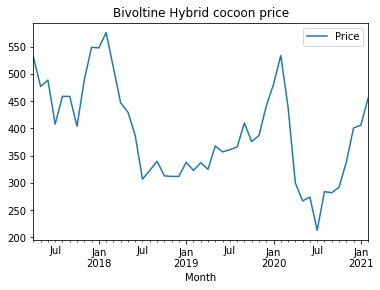

In [4]:
df.shape

df[['Price']].plot(title='Bivoltine Hybrid cocoon price')

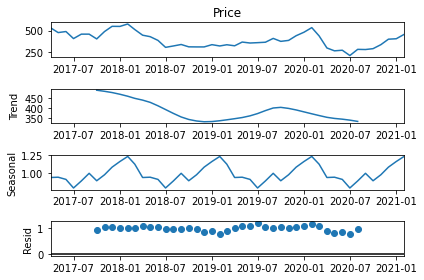

In [5]:
decompose_result = seasonal_decompose(df['Price'],model='multiplicative')
decompose_result.plot();

In [6]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)
alpha?

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


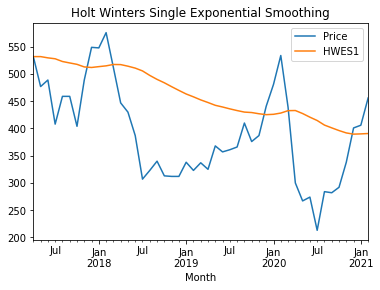

In [7]:
#Holt's winter single exponential smoothing:

df['HWES1'] = SimpleExpSmoothing(df['Price']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
df[['Price','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


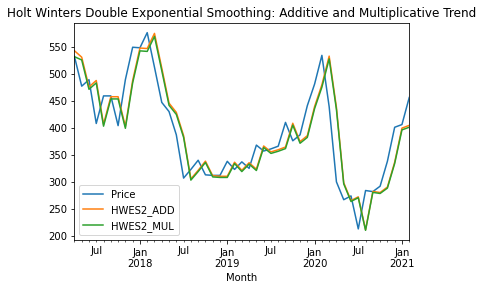

In [8]:
#Holt's winter double exponential smoothing:

df['HWES2_ADD'] = ExponentialSmoothing(df['Price'],trend='add').fit().fittedvalues
df['HWES2_MUL'] = ExponentialSmoothing(df['Price'],trend='mul').fit().fittedvalues
df[['Price','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


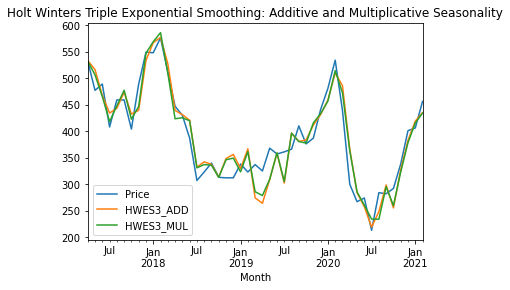

In [9]:
#Holts winter triple exponential smoothing:

df['HWES3_ADD'] = ExponentialSmoothing(df['Price'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

df['HWES3_MUL'] = ExponentialSmoothing(df['Price'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

df[['Price','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

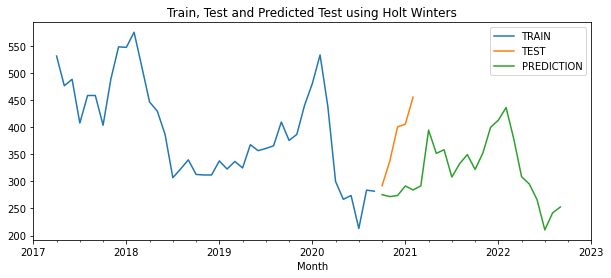

In [10]:
#Split data into train and test:

train_df = df[:42]
test_df = df[42:]


#Forecasting with holts winter exponential smoothing:

fitted_model = ExponentialSmoothing(train_df['Price'],trend='mul',seasonal='mul',seasonal_periods=24).fit()
test_predictions = fitted_model.forecast(24)
train_df['Price'].plot(legend=True,label='TRAIN')
test_df['Price'].plot(legend=True,label='TEST',figsize=(10,4))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2017/01/01','2023/01/01'])
plt.title('Train, Test and Predicted Test using Holt Winters')

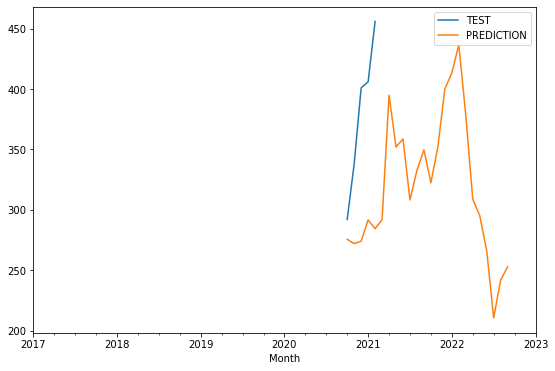

In [11]:
test_df['Price'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2017/01/01','2023/01/01']);

In [12]:
result = pd.concat([df, test_predictions])
result.to_csv("C:\\Users\\Admin\\Documents\\output_forecasting\\output_bivoltine_hybrid.csv")

test_predictions

2020-10-01    275.594359
2020-11-01    271.995705
2020-12-01    273.991126
2021-01-01    291.670556
2021-02-01    284.302827
2021-03-01    291.830321
2021-04-01    394.944462
2021-05-01    351.999095
2021-06-01    358.697058
2021-07-01    308.145772
2021-08-01    332.679477
2021-09-01    349.701561
2021-10-01    322.314990
2021-11-01    352.261992
2021-12-01    400.011106
2022-01-01    413.323286
2022-02-01    436.735725
2022-03-01    378.334264
2022-04-01    308.809052
2022-05-01    295.288307
2022-06-01    266.213583
2022-07-01    210.387860
2022-08-01    241.813916
2022-09-01    252.738218
Freq: MS, dtype: float64

In [ ]:
# #Forecating score:

# # mse = test_predictions[0]-df['Price'] _# mse.tail()test+

# test_predections = pd.DataFrame(test_predictions)
# test_predictions

# result = pd.concat([df, test_predictions])
# result.to_csv("C:\\Users\\Admin\\Documents\\output_forecasting\\output_bivoltine_hybrid.csv")
# result
# # result = result.rename(columns={0: 'forecast'}, inplace=True) 


In [ ]:
# from sklearn.metrics import mean_absolute_error,mean_squared_error

# print(f'Mean Absolute Error = {mean_absolute_error(test_df,test_df)}')
# print(f'Mean Squared Error = {mean_squared_error(test_df,test_df)}')